In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

filepath="creditcard.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath))
os.chdir(pwd)
print(df.head(3))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


### 异常检测，属分类任务，用逻辑回归（二分类，0/1）

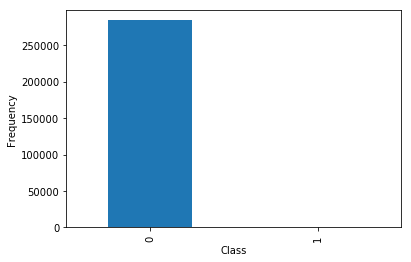

In [4]:
count_classes=pd.value_counts(df["Class"],sort=True).sort_index()
count_classes.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Frequency")

## 对于某些列，值差异过大，需做标准化/归一化（用sklearn）

In [10]:
from sklearn.preprocessing import StandardScaler

df["normAmount"]=StandardScaler().fit_transform(df["Amount"].values.reshape(-1,1))
df=df.drop(["Time","Amount"],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 样本不均衡解决办法：生成新样本（过采样、下采样）

### 方法一：下采样（样本数同样少）

In [12]:
X=df.iloc[:,df.columns!="Class"]
y=df.iloc[:,df.columns=="Class"]

In [17]:
number_class_1=len(df[df.Class==1])
class_1_index=np.array(df[df.Class==1].index)

class_0_index=df[df.Class==0].index

random_class_0_index=np.random.choice(class_0_index,number_class_1,replace=False)
random_class_0_index=np.array(random_class_0_index)

#提取下采样样本，两个类别数量相同
under_sample_index=np.concatenate([class_1_index,random_class_0_index])
under_sample_data=df.iloc[under_sample_index,:]

X_undersample=under_sample_data.loc[:,under_sample_data.columns!="Class"]
y_undersample=under_sample_data.loc[:,under_sample_data.columns=="Class"]

percentage_class_1=len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data)
percentage_class_0=len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data)
print("percentage_class_1:",percentage_class_1)
print("percentage_class_0:",percentage_class_0)
print("Total of transactions in resampled data:",len(under_sample_data))

percentage_class_1: 0.5
percentage_class_0: 0.5
Total of transactions in resampled data: 984


## 11.4  交叉验证（sklearn.cross_validation.train_test_split）

In [19]:
from sklearn.cross_validation import train_test_split

#对原始数据集进行切分
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print("number of train dataset:",len(X_train))
print("number of test dataset:",len(X_test))
print("total number of dataset:",len(X_test)+len(X_train))

#对下采样数据集进行切分
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)

print("number of train_undersample dataset:",len(X_train_undersample))
print("number of test_undersample dataset:",len(X_test_undersample))
print("total number of undersample dataset:",len(X_test_undersample)+len(X_train_undersample))

number of train dataset: 199364
number of test dataset: 85443
total number of dataset: 284807
number of train_undersample dataset: 688
number of test_undersample dataset: 296
total number of undersample dataset: 984


## 11.5-11.6  模型评估方法、正则化惩罚(l1与l2惩罚)

不能单纯使用准确率（如会把所有数据都预测为正常的模型，假如有1000个样本。10个是异常的，那么准确率是99%，显然这样评估是错误的）

 Recall = TP/(TP+FN)

（混淆矩阵）FN（False Nagative）为“误杀”，误杀率可以通过调节阈值来降低FN

### 查准率、查全率（recall）、混淆矩阵（TP/FP/FN/TN）

In [20]:
#Recall=TP/(TP+FN)

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
#confusion_matrix混淆矩阵
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [53]:
def printing_Kfold_scores(X_train,y_train):
    fold=KFold(len(y_train),5,shuffle=False)
    
    #惩罚力度参数C值，不同C值生成不同的模型，需评估获取最优参数
    c_range=[0.01,0.1,1,10,100]
    
    results_table=pd.DataFrame(index=range(len(c_range),2),columns=["C_value","Mean recall "])
    results_table["C_value"]=c_range
    
    j=0
    #多个C值进行比较
    for c in c_range:
        print("--"*15)
        print("c value:",c)
        print("--"*15)
        print("")
        
        recall_accs=[]
        #在每个C值下多次做交叉验证
        for iteration,index in enumerate(fold,start=1):
      
            #逻辑回归模型实例化，使用参数c，penalty设置惩罚项为l1算法
            lr=LogisticRegression(C=c,penalty="l1")   
            lr.fit(X_train.iloc[index[0],:],y_train.iloc[index[0],:].values.ravel())
            # 模型预测
            y_pred_undersample = lr.predict(X_train.iloc[index[1],:].values)

            #计算recall值
            recall_acc = recall_score(y_train.iloc[index[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        #求recall值的平均值
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('recall均值 ', np.mean(recall_accs))
        print('')

    #找到最佳C值
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_value']
    
    #输出最佳C值
    print("--"*15)
    print('最佳C值', best_c)
    print("--"*15)
    
    return best_c

In [54]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

------------------------------
c value: 0.01
------------------------------

Iteration  1 : recall score =  0.958904109589
Iteration  2 : recall score =  0.931506849315
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.959459459459
Iteration  5 : recall score =  0.969696969697

recall均值  0.963913477612

------------------------------
c value: 0.1
------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.86301369863
Iteration  3 : recall score =  0.966101694915
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.909090909091

recall均值  0.906693463415

------------------------------
c value: 1
------------------------------

Iteration  1 : recall score =  0.86301369863
Iteration  2 : recall score =  0.890410958904
Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.909090909091

recall均值  0.918302472006

---------------

### 过拟合：训练集效果好、测试集效果差

L2正则化：loss+1/2w**2

L1正则化：|w|

惩罚力度：lamda

## 11.7 逻辑回归模型

### 混淆矩阵

In [55]:
def plot_confusion_matrix(cm, classes,title='混淆矩阵',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

测试集下的查全率:  0.931972789116


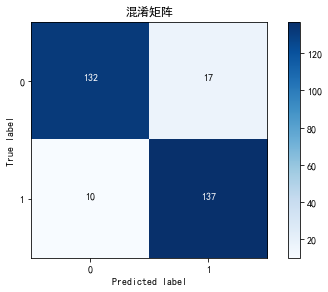

In [59]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("测试集下的查全率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='混淆矩阵')
plt.show()

## 过采样（imlearn.over_sampling.SMOTE算法生成数据）

下采样为under_sample

In [60]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [61]:
filepath="C:\\Users\\ma\\Desktop\\唐宇迪-机器学习课程\\麻书琴笔记\\creditcard.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath))
os.chdir(pwd)

In [64]:
columns=df.columns
features=columns.delete(len(columns)-1)
features=df[features]
labels=df["Class"]

In [70]:
features_train,features_test,labels_train,labels_test=train_test_split(features,
                                                                         labels,
                                                                         test_size=0.2,
                                                                         random_state=0)

In [71]:
#实例化SMOTE对象，random_state=0指定每次生成数据一样
oversampler=SMOTE(random_state=0)
#fit_sample训练,生成数据
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [72]:
len(os_labels[os_labels==1])

227454

In [69]:
os_features=pd.DataFrame(os_features)
os_labels=pd.DataFrame(os_labels)
best_c=printing_Kfold_scores(os_features,os_labels)

------------------------------
c value: 0.01
------------------------------

Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.968861347792
Iteration  4 : recall score =  0.953111089128
Iteration  5 : recall score =  0.958386915949

recall均值  0.933083755124

------------------------------
c value: 0.1
------------------------------

Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.970476928184
Iteration  4 : recall score =  0.960013629219
Iteration  5 : recall score =  0.960453281454

recall均值  0.935200652322

------------------------------
c value: 1
------------------------------

Iteration  1 : recall score =  0.890322580645
Iteration  2 : recall score =  0.894736842105
Iteration  3 : recall score =  0.969458891225
Iteration  4 : recall score =  0.960376342313
Iteration  5 : recall score =  0.959815785714

recall均值  0.9349420884

----

Recall值： 0.910891089109


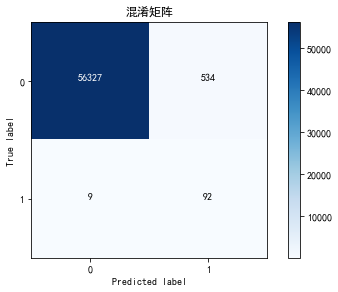

In [79]:
#生成数据后，用数据训练模型
#模型实例化
lr=LogisticRegression(C=best_c,penalty="l1")
#模型训练，ravel()：转化为1维数组
lr.fit(os_features,os_labels.ravel())
#模型测试
y_pred=lr.predict(features_test.values)

#计算混淆矩阵
matrix=confusion_matrix(labels_test,y_pred)

print("Recall值：",matrix[1,1]/(matrix[1,0]+matrix[1,1]))

#绘图
class_names=[0,1]
plt.figure()
plot_confusion_matrix(matrix,
                     classes=class_names,
                     title="混淆矩阵")
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
plt.show()

关键点总结：
1.特征标准化
2.模型参数选择（交叉验证）